# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque

import matplotlib.pyplot as plt
%matplotlib inline

#ddpg agent
from ddpg_agent import Agent

In [2]:
import torch
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Environment 2, 20 agents

In [3]:
env = UnityEnvironment(file_name='../../Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


In [6]:
def ddpg(episodes=500, max_t=1000, window=100):
    agent = Agent(state_size=state_size, action_size=action_size, random_seed=1)
    
    scores_window = deque(maxlen = window)
    scores_all = []
    actor_losses = []
    critic_losses = []
    mean_scores_over_agents = []
    
    decay_lr_episodes = 10
    for i in range(1, episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        agent.reset()
        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            scores += env_info.rewards                         # update the score (for each agent)
            for state,action,reward,next_state,done in zip(states,actions,rewards,next_states,dones):
                agent.step(state,action,reward,next_state,done,t)
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break

        scores_all.append(scores)
        scores_window.append(np.mean(scores))   
        average_score = np.mean(scores_window) 

        print('Episode: {}\tScore average: {:.2f}\tepisode max: {:.2f}'.format(i, average_score, np.max(scores)))
        if average_score >= 30.0:
            print('\rTarget score reached in Episode: {}\t average score:{:.2f}'.format(i+1, average_score))
            torch.save(agent.actor_local.state_dict(), "07May_actor.pt")
            torch.save(agent.critic_local.state_dict(), "07May_critic.pt")
            break
            
    return scores_all, scores_window

## Train Reacher environment 2 - 20 agents

In [7]:
scores, scores_window  = ddpg()

Episode: 1	Score average: 0.97	episode max: 3.12
Episode: 2	Score average: 1.24	episode max: 2.40
Episode: 3	Score average: 1.55	episode max: 4.31
Episode: 4	Score average: 1.78	episode max: 4.16
Episode: 5	Score average: 1.98	episode max: 4.14
Episode: 6	Score average: 2.16	episode max: 5.59
Episode: 7	Score average: 2.24	episode max: 4.66
Episode: 8	Score average: 2.32	episode max: 5.35
Episode: 9	Score average: 2.46	episode max: 6.40
Episode: 10	Score average: 2.80	episode max: 8.39
Episode: 11	Score average: 3.11	episode max: 8.67
Episode: 12	Score average: 3.37	episode max: 8.72
Episode: 13	Score average: 3.65	episode max: 10.93
Episode: 14	Score average: 3.97	episode max: 11.75
Episode: 15	Score average: 4.26	episode max: 10.53
Episode: 16	Score average: 4.57	episode max: 13.20
Episode: 17	Score average: 4.92	episode max: 19.61
Episode: 18	Score average: 5.28	episode max: 16.41
Episode: 19	Score average: 5.63	episode max: 16.43
Episode: 20	Score average: 5.98	episode max: 17.73
E

Text(0.5, 0, 'Episode #')

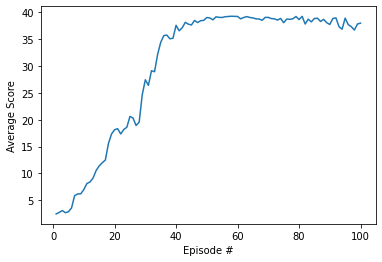

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_window)+1), scores_window)
plt.ylabel('Average Score')
plt.xlabel('Episode #')
plt.title('Learning')

#####   For smart agents to play

In [9]:
agent = Agent(state_size=state_size, action_size=action_size, random_seed=1)
agent.actor_local.load_state_dict(torch.load('07May_actor.pt'))
agent.critic_local.load_state_dict(torch.load('07May_critic.pt'))

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment
agent.reset()

for t in range(1000):
    actions = agent.act(env_info.vector_observations, add_noise=False)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]
    if np.any(env_info.local_done):
        break 


Close the environment

In [10]:
env.close()